In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import codecs
import glob

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl

from IPython.display import display
pd.options.display.max_columns = None

#import
from WC import WordcloudPlot, Teste, WordcloudPlotLIST

In [8]:
columns =  ['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS',
       'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU',
       'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN',
       'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'EY', 'PG', 'WC',
       'SC', 'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA']
path =r'all/' # use your path
allFiles = glob.glob(path + "/*.txt")
#doc = codecs.open(myfile,'rU','UTF-16')

frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    #print(file_)
    doc = codecs.open(file_,'rU','UTF-16')
    df = pd.read_csv(doc,usecols=columns, sep='\t',parse_dates=True)
    df=df.where((pd.notnull(df)), None)
    list_.append(df)
frame = pd.concat(list_)

In [9]:
frame.shape

(2000, 68)

In [10]:
frame.head(2)

,PT,AU,BA,BE,GP,AF,BF,CA,TI,SO,SE,BS,LA,DT,CT,CY,CL,SP,HO,DE,ID,AB,C1,RP,EM,RI,OI,FU,FX,CR,NR,TC,Z9,U1,U2,PU,PI,PA,SN,EI,BN,J9,JI,PD,PY,VL,IS,PN,SU,SI,MA,BP,EP,AR,DI,D2,EA,EY,PG,WC,SC,GA,UT,PM,OA,HC,HP,DA
0,J,"Conings, B; Drijkoningen, J; Gauquelin, N; Bab...",None,None,None,"Conings, Bert; Drijkoningen, Jeroen; Gauquelin...",None,None,Intrinsic Thermal Instability of Methylammoniu...,ADVANCED ENERGY MATERIALS,None,None,English,Article,None,None,None,None,None,atomic force microscopy; perovskite solar cell...,HYBRID SOLAR-CELLS; ELECTRONIC-STRUCTURE; HALI...,Organolead halide perovskites currently are th...,"[Conings, Bert; Drijkoningen, Jeroen; Babayigi...","Conings, B (reprint author), Hasselt Univ, Ins...",bert.conings@uhasselt.be; hansgerd.boyen@uhass...,"Boyen, Hans-Gerd/N-2214-2014; D'Haen, Jan/K-19...","Boyen, Hans-Gerd/0000-0003-0711-7597; D'Haen, ...","Bijzonder Onderzoeksfonds (BOF, Hasselt Univer...",This work was financially supported by the Bij...,"Acik IO, 2009, J THERM ANAL CALORIM, V97, P39,...",49,311,313,51,318,WILEY-V C H VERLAG GMBH,WEINHEIM,"BOSCHSTRASSE 12, D-69469 WEINHEIM, GERMANY",1614-6832,1614-6840,None,ADV ENERGY MATER,Adv. Energy Mater.,AUG 5,2015,5,15,None,None,None,None,None,None,1500477,10.1002/aenm.201500477,None,None,None,8,"Chemistry, Physical; Energy & Fuels; Materials...",Chemistry; Energy & Fuels; Materials Science; ...,CO7WT,WOS:000359374900005,None,None,Y,N,2018-05-11
1,J,"Yan, Y; Qian, Y; Sharif, H; Tipper, D",None,None,None,"Yan, Ye; Qian, Yi; Sharif, Hamid; Tipper, David",None,None,A Survey on Smart Grid Communication Infrastru...,IEEE COMMUNICATIONS SURVEYS AND TUTORIALS,None,None,English,Article,None,None,None,None,None,Smart grid; communication infrastructure; inte...,POWER-LINE COMMUNICATION; MICRO-GENERATION; SY...,A communication infrastructure is an essential...,"[Yan, Ye; Qian, Yi; Sharif, Hamid] Univ Nebras...","Yan, Y (reprint author), Univ Nebraska Lincoln...",yqian@ieee.org,None,None,None,None,"Acharya S., 2010, IEEE PES TRANSM DIST, P1; Ag...",100,311,322,47,156,IEEE-INST ELECTRICAL ELECTRONICS ENGINEERS INC,PISCATAWAY,"445 HOES LANE, PISCATAWAY, NJ 08855-4141 USA",1553-877X,None,None,IEEE COMMUN SURV TUT,IEEE Commun. Surv. Tutor.,None,2013,15,1,None,None,None,None,5,20,None,10.1109/SURV.2012.021312.00034,None,None,None,16,"Computer Science, Information Systems; Telecom...",Computer Science; Telecommunications,125XA,WOS:000317574100002,None,None,Y,N,2018-05-11


# Criando a rede de cocitacoes baseado nos abstract

## Cada artigo sera analisado com todos, a sua conecção será baseada na quantidade de palavras iguais no abstract

In [18]:
listadicio={'autores':frame.AU.tolist(),'abstract':frame.AB.tolist()}

In [21]:
autores =frame.AU.tolist()
abstract=frame.AB.tolist()

In [22]:
listadicio.keys()

dict_keys(['autores', 'abstract'])

# Redes codigos

In [24]:
import pdb
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import community
import operator
import nltk

from networkx.readwrite import json_graph
import json

partition_colors = ['#DD0000', '#00DD00', '#0000DD', '#DDDD00',
                    '#00DDDD', '#DD00DD', '#880000', '#008800',
                    '#000088', '#880088', '#888800', '#008888',
                    '#440000', '#004400', '#000044', '#440044',
                    '#444400', '#004444', '#220000', '#002200',
                    '#000022', '#220022', '#222200', '#002222']


G = nx.Graph()

In [61]:
listaset =[]
tamanho = len(autores)
tamanhoset =5 
for i in range(0,tamanho):
    primeiro = autores[i]
    #G.add_node(primeiro)
    for j in range(i+1,tamanho):
        segundo = autores[j]
        #print(abstract[j],'\n')
        #print(abstract[i],'\n')
        try:
            value = (set(abstract[i].split(' ')).intersection(abstract[j].split(' ')))
            value = set(value).difference(STOPWORDS)
            value =[s for s in value if len(s) > 4]
            if len(value)>tamanhoset:
                G.add_edge(primeiro,segundo,weight=len(values))
            listaset.append(value)
        except:
            pass
        #break
    #break
    

In [62]:
len(listaset)

1452692

In [66]:
G.nodes()

NodeView(())

In [67]:
G.edges()

EdgeView([])

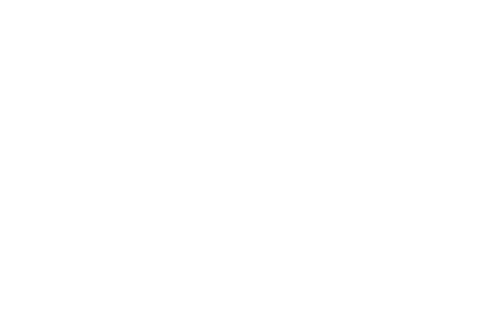

In [68]:
nx.draw(G)